In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
SIM     = "sim_steady_real_out"
PATH    = "right_iliac"
CSV     = "/media/marsdenlab/Data1/UQ/0110/"+SIM+'/csv/'+PATH+".csv"

generation = 1 
mesh       = 'medium'

FIG_DIR = os.path.join("/media/marsdenlab/Data1/UQ/0110/",SIM,
                       str(generation),mesh,PATH,"stats")


# quants  = ["area", "radius_actual", "pressure_00400_0", "velocity_00400_3", "vWSS_00400_3_boundary"]

# labels = [ "area", "radius", "pressure", "velocity", "vWSS"]

quant = "vWSS_3_boundary"
label = "vWSS"

BOOT_ROUNDS = 50

df = pd.read_csv(CSV)

data = df.loc[(df['mesh']==mesh) & (df['generation']==generation)]

models = list(data['model'].unique())
x      = list(data['point'].unique())

Nx = len(x)
Nm = len(models)

print(df.columns)
print(Nm,' models')
print(Nx,' points')

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'path', 'point', 'pressure_0', 'pressure_0_boundary',
       'radius_actual', 'radius_supplied', 'time', 'vWSS_0', 'vWSS_0_boundary',
       'vWSS_1', 'vWSS_1_boundary', 'vWSS_2', 'vWSS_2_boundary', 'vWSS_3',
       'vWSS_3_boundary', 'velocity_0', 'velocity_0_boundary', 'velocity_1',
       'velocity_1_boundary', 'velocity_2', 'velocity_2_boundary',
       'velocity_3', 'velocity_3_boundary', 'x', 'y', 'z'],
      dtype='object')
43  models
19  points


In [3]:
d1 = FIG_DIR+'/'+str(generation)
io.rmdir(d1)
io.mkdir(d1)

d2 = d1+'/'+mesh    
io.mkdir(d2)

In [4]:
Y  = np.zeros((Nm,Nx))
for i,mo in enumerate(models):
    y    = data.loc[data['model']==mo][quant].values
    Y[i] = y

In [5]:
MAT_STD = np.zeros((Nm-2,BOOT_ROUNDS))
inds    = np.arange(Nm)
BOOT_INDS = range(2,Nm)
for i in BOOT_INDS:
    for j in range(BOOT_ROUNDS):
        boot_inds = np.random.choice(inds, size=i)
        data = Y[boot_inds]
        sigs = np.std(data,axis=1)
        sig_bar = np.mean(sigs)
        
        MAT_STD[i-2,j] = sig_bar

In [6]:
mu_std = np.mean(MAT_STD,axis=1)
std_std = np.std(MAT_STD,axis=1)
rel_std = std_std/mu_std

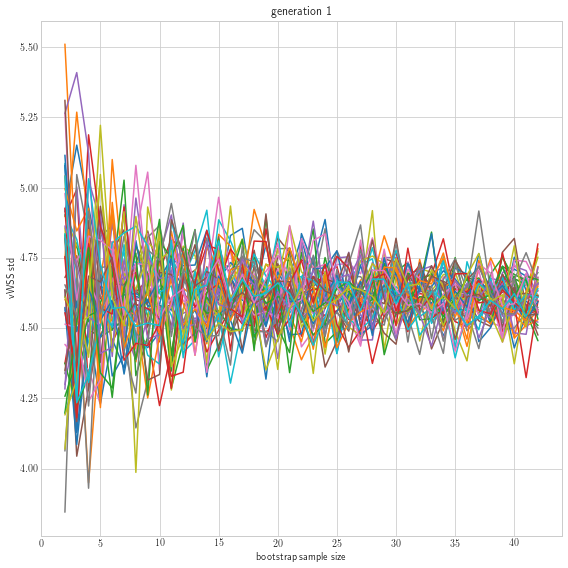

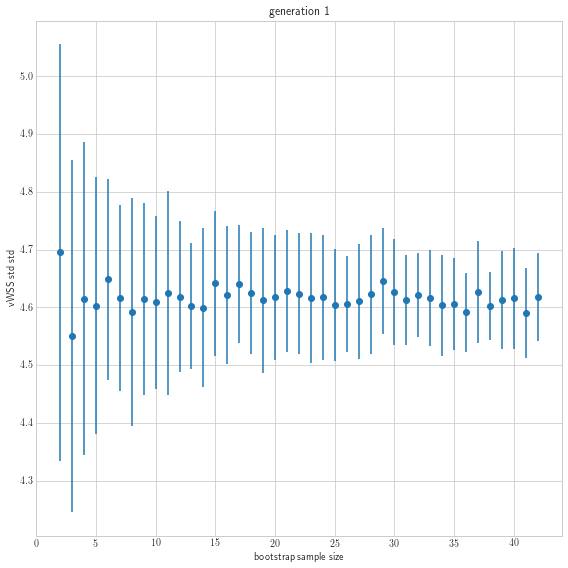

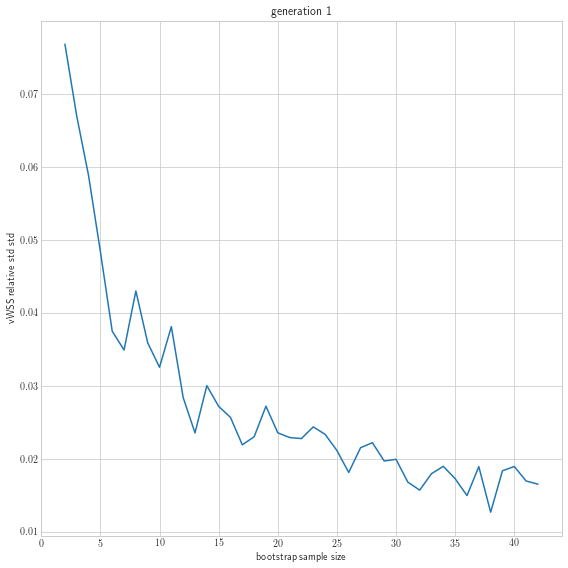

In [7]:
plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.plot(BOOT_INDS, MAT_STD)
plt.ylabel(label + ' std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.errorbar(BOOT_INDS,y=mu_std, yerr=std_std, fmt='o')
plt.ylabel(label + ' std std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.plot(BOOT_INDS,rel_std)
plt.ylabel(label +' relative std std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()